In [283]:
import numpy as np 
import math 
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt

file = 'DATA/list10000polyg_N400_seq0001_be0.400_3d_ooo.dat'
with open (file, "r") as myfile:
    full_data=myfile.readlines()
data=list(full_data[3][:-1])
print(data)

['1', '1', '5', '5', '1', '2', '2', '2', '3', '4', '3', '4', '5', '3', '3', '3', '3', '1', '0', '2', '4', '0', '1', '1', '0', '2', '1', '0', '2', '0', '4', '3', '4', '4', '5', '3', '5', '4', '0', '0', '5', '5', '5', '1', '2', '2', '1', '1', '3', '2', '2', '4', '3', '5', '5', '3', '1', '0', '5', '4', '0', '4', '4', '5', '3', '3', '2', '3', '1', '3', '1', '1', '5', '4', '3', '5', '5', '4', '4', '2', '0', '1', '3', '2', '0', '0', '0', '1', '3', '5', '0', '4', '5', '4', '0', '4', '5', '5', '3', '4', '4', '5', '3', '3', '1', '2', '0', '5', '0', '1', '5', '1', '2', '1', '1', '0', '2', '1', '3', '1', '3', '3', '3', '4', '4', '4', '2', '0', '2', '4', '4', '5', '4', '0', '2', '0', '5', '1', '1', '5', '1', '1', '3', '3', '4', '4', '2', '0', '1', '1', '3', '1', '5', '5', '5', '4', '3', '2', '4', '0', '4', '5', '0', '5', '3', '1', '0', '2', '1', '1', '0', '5', '0', '0', '4', '2', '4', '4', '0', '4', '4', '3', '3', '3', '4', '3', '1', '1', '2', '1', '2', '1', '5', '1', '1', '0', '1', '5', '1', '5',

In [291]:
cx, cy, cz = 0,0,0
#coordinate di ogni passo
fcx,fcy,fcz=[cx],[cy],[cz]
#coordinate di ogni spigolo
X,Y,Z=[cx],[cy],[cz]
temp=(0,0,0)
for i in range(0,len(data)):
    if data[i]=='0':
        cx+=1
    elif data[i]=='1':
        cy+=1
    elif data[i]=='2':
        cz+=1        
    elif data[i]=='3':
        cx-=1
    elif data[i]=='4':
        cy-=1
    elif data[i]=='5':
        cz-=1
        
    fcx.append(cx)
    fcy.append(cy)
    fcz.append(cz)
    
    #solo gli spigoli
    if(i==len(data)-1):
        X.append(cx)
        Y.append(cy)
        Z.append(cz)
    try:
        if(i<len(data) and data[i]!=data[i+1]):
            X.append(cx)
            Y.append(cy)
            Z.append(cz)
    except:
        continue


minx,miny,minz=np.amin(fcx),np.amin(fcy),np.amin(fcz)
for i in range(0,len(fcx)):
    fcx[i]=fcx[i]+abs(minx)
    fcy[i]=fcy[i]+abs(miny)
    fcz[i]=fcz[i]+abs(minz)
minX,minY,minZ=np.amin(X),np.amin(Y),np.amin(Z)
for i in range(0,len(X)):
    X[i]=X[i]+abs(minX)
    Y[i]=Y[i]+abs(minY)
    Z[i]=Z[i]+abs(minZ)

In [292]:
if((abs(np.sign(X[1]-X[-1]))+abs(np.sign(Y[1]-Y[-1]))+abs(np.sign(Z[1]-Z[-1])))==1):
    X.pop(0)
    Y.pop(0)
    Z.pop(0)

if((abs(np.sign(X[-2]-X[0]))+abs(np.sign(Y[-2]-Y[0]))+abs(np.sign(Z[-2]-Z[0])))==1):
    X.pop(-1)
    Y.pop(-1)
    Z.pop(-1)


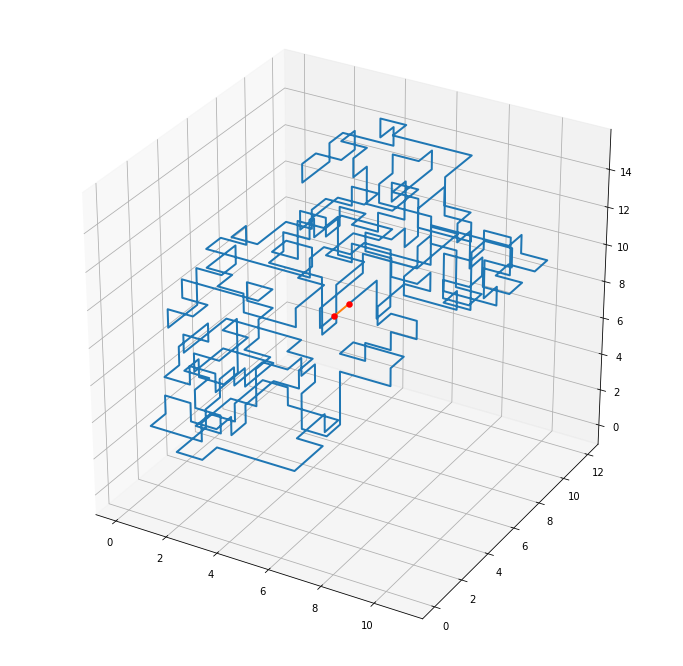

In [293]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot( projection='3d')
ax.plot(fcx, fcy, fcz, lw=2)
ax.scatter(fcx[0], fcy[0], fcz[0], lw=2, c='r')
ax.scatter(fcx[-1], fcy[-1], fcz[-1], lw=2, c='r')
ax.view_init(30)
ax.plot([fcx[0],fcx[-1]], [fcy[0],fcy[-1]], [fcz[0],fcz[-1]], lw=2);

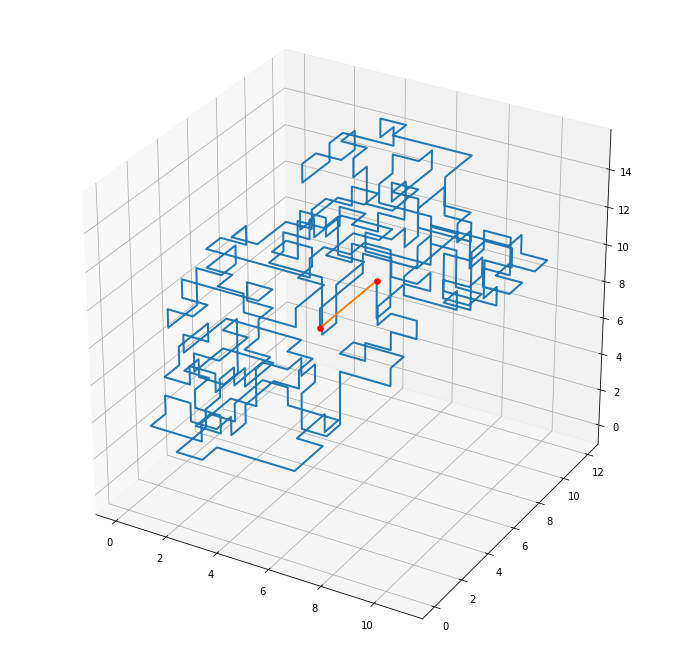

In [294]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot( projection='3d')
ax.plot(X, Y, Z, lw=2)
ax.scatter(X[0], Y[0], Z[0], lw=2, c='r')
ax.scatter(X[-1], Y[-1], Z[-1], lw=2, c='r')
ax.view_init(30)
ax.plot([X[0], X[-1]], [Y[0], Y[-1]], [Z[0], Z[-1]], lw=2);

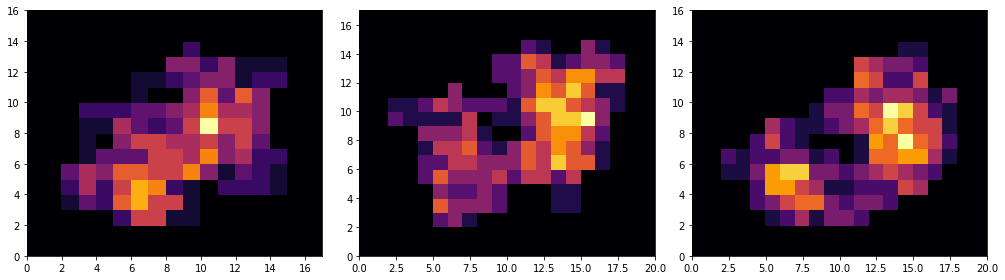

In [295]:
pic2dz=np.zeros(shape=(np.amax(fcx)+5,np.amax(fcy)+5))
pic2dx=np.zeros(shape=(np.amax(fcy)+5,np.amax(fcz)+5))
pic2dy=np.zeros(shape=(np.amax(fcx)+5,np.amax(fcz)+5))

for x,y,z in zip(fcx,fcy,fcz):
    pic2dz[x+2,y+2]+=1
    pic2dx[y+2,z+2]+=1
    pic2dy[x+2,z+2]+=1

fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(14,4))

ax0.pcolor(pic2dz, cmap="inferno")
ax1.pcolor(pic2dx, cmap="inferno")
ax2.pcolor(pic2dy, cmap="inferno")
fig.tight_layout()
plt.show()

In [296]:
def dihedral(p1,p2,p3,p4):
    q1 = np.subtract(p2,p1) # b - a
    q2 = np.subtract(p3,p2) # c - b
    q3 = np.subtract(p4,p3) # d - c
    q1_x_q2 = np.cross(q1,q2)
    q2_x_q3 = np.cross(q2,q3)
    n1 = q1_x_q2/np.sqrt(np.dot(q1_x_q2,q1_x_q2))
    n2 = q2_x_q3/np.sqrt(np.dot(q2_x_q3,q2_x_q3))
    u1 = n2
    u3 = q2/(np.sqrt(np.dot(q2,q2)))
    u2 = np.cross(u3,u1)
    cos_theta = np.dot(n1,u1)
    sin_theta = np.dot(n1,u2)
    theta = -math.atan2(sin_theta,cos_theta) 
    return theta

In [315]:
'''versione easy'''

def dihedral2(p1,p2,p3,p4):
    q1 = np.subtract(p2,p1) # b - a
    q2 = np.subtract(p3,p2) # c - b
    q3 = np.subtract(p4,p3) # d - c
    q1_x_q2 = np.cross(q1,q2)
    u2 = np.dot(q1_x_q2,q3)
    cos_theta = np.dot(n1,u1)
    sin_theta = np.dot(n1,u2)
    theta = -math.atan2(sin_theta,cos_theta) 
    return theta

In [ ]:
def gen_dihedral(p1,p2,p3,p4,p5):
    q1 = np.subtract(p2,p1) # b - a
    q2 = np.subtract(p3,p2) # c - b
    q3 = np.subtract(p5,p4) # d - c
    q1_x_q2 = np.cross(q1,q2)
    q2_x_q3 = np.cross(q2,q3)
    n1 = q1_x_q2/np.sqrt(np.dot(q1_x_q2,q1_x_q2))
    n2 = q2_x_q3/np.sqrt(np.dot(q2_x_q3,q2_x_q3))
    u1 = n2
    u3 = q2/(np.sqrt(np.dot(q2,q2)))
    u2 = np.cross(u3,u1)
    cos_theta = np.dot(n1,u1)
    sin_theta = np.dot(n1,u2)
    theta = -math.atan2(sin_theta,cos_theta) 
    return theta

In [297]:
from math import sqrt, pow
X_origin=np.copy(fcx)
n=len(X_origin)
fcx=fcx+fcx[0:3]
fcy=fcy+fcy[0:3]
fcz=fcz+fcz[0:3]

#matrice delle distanze relative
d=np.zeros(shape=(n, n))
died=np.zeros(shape=(n, n))
#vettore degli elementi indipendenti
d_indep=[]
cross=np.zeros(shape=(n, n))
dot=np.zeros(shape=(n, n))
def edist(x1,y1,z1,x2,y2,z2):
    return sqrt(pow((x1-x2),2) + pow((y1-y2),2) + pow((z1-z2),2))
           
for i in range(0,n):
    for j in range(0,n):
        tdist=edist(fcx[i],fcy[i],fcz[i],fcx[j],fcy[j],fcz[j])
        d[i,j]=tdist
        p1=[fcx[i-1],fcy[i-1],fcz[i-1]]
        p2=[fcx[i],fcy[i],fcz[i]]
        p3=[fcx[i+1],fcy[i+1],fcz[i+1]]
        p4=[fcx[j+1],fcy[j+1],fcz[j+1]]
        p5=[fcx[j+2],fcy[j+2],fcz[j+2]]
        died[i,j]=gen_dihedral(p1,p2,p3,p4,p5)
        if (i-j)>0:
            d_indep.append(tdist)
        cross[i,j]=np.linalg.norm(np.cross([(fcx[i]-fcx[i-1]),(fcy[i]-fcy[i-1]),(fcz[i]-fcz[i-1])],[(fcx[j]-fcx[j-1]),(fcy[j]-fcy[j-1]),(fcz[j]-fcz[j-1])]))  
        dot[i,j]=(np.dot([(fcx[i]-fcx[i-1]),(fcy[i]-fcy[i-1]),(fcz[i]-fcz[i-1])],[(fcx[j]-fcx[j-1]),(fcy[j]-fcy[j-1]),(fcz[j]-fcz[j-1])]))
centr_d = d - np.mean(d)
norms_d = np.linalg.norm(centr_d)
std_d = centr_d / norms_d

died=np.nan_to_num(died)

centr_d_indep = d_indep - np.mean(d_indep)
norms_d_indep = np.linalg.norm(centr_d_indep)
std_d_indep = centr_d_indep / norms_d_indep

C:\Users\angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


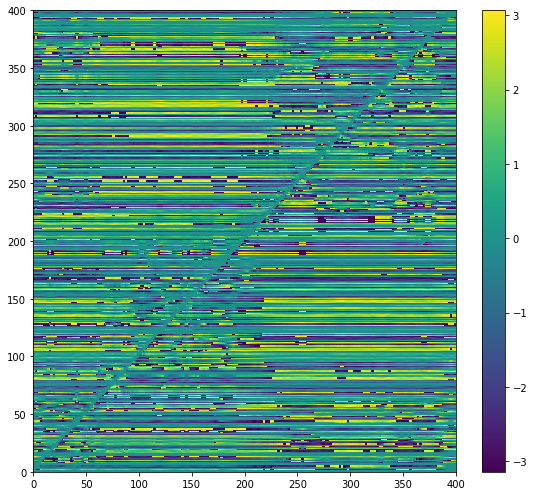

In [298]:
fig, ax= plt.subplots(figsize=(8,7))

c=ax.pcolor(died)
fig.colorbar(c, ax=ax, )
fig.tight_layout()
plt.show()

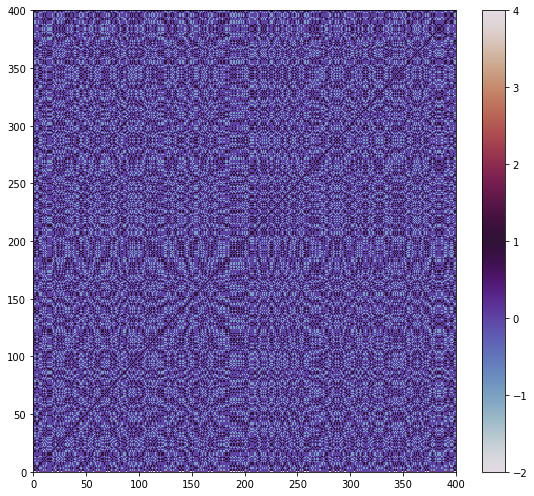

In [299]:
fig, ax= plt.subplots(figsize=(8,7))
c=ax.pcolor(dot, cmap='twilight')
fig.colorbar(c, ax=ax )
fig.tight_layout()
plt.show()

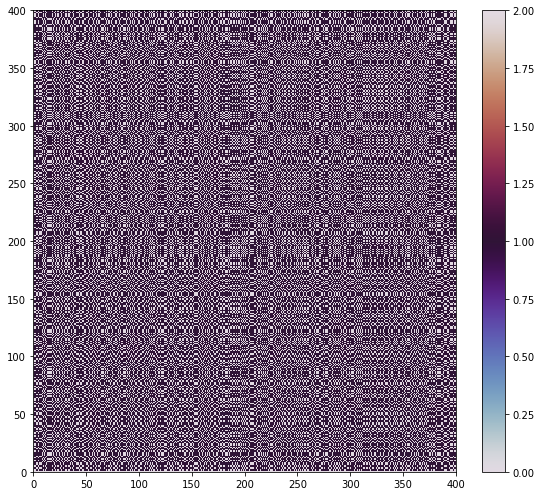

In [300]:
fig, ax= plt.subplots(figsize=(8,7))

c=ax.pcolor(cross,cmap='twilight')
fig.colorbar(c, ax=ax)
fig.tight_layout()
plt.show()

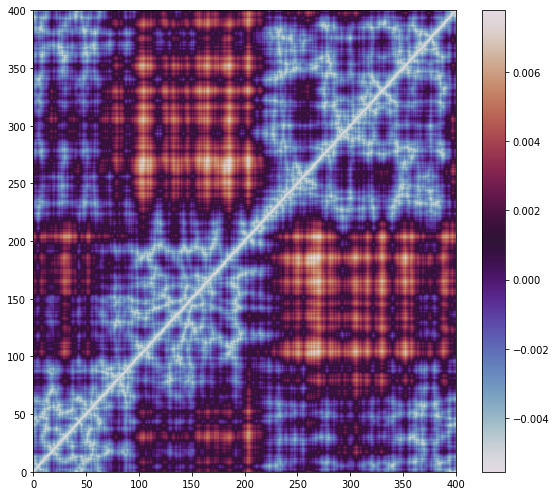

In [307]:
fig, ax= plt.subplots(figsize=(8,7))

c=ax.pcolor(std_d, cmap='twilight')
fig.colorbar(c, ax=ax, )
fig.tight_layout()
plt.show()

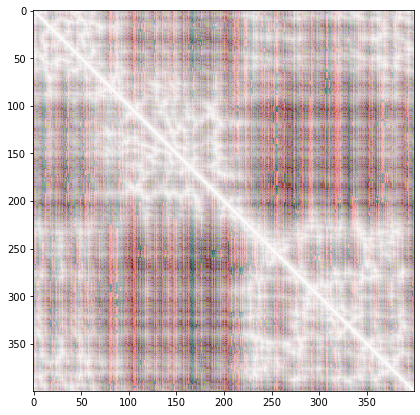

In [309]:
from PIL import Image

size=len(std_d)

arr = np.zeros((4,size,size))
arr[3]=255*(std_d-std_d.min())/(std_d.max()-std_d.min())
arr[2]=255*(cross-cross.min())/(cross.max()-cross.min())
arr[1]=255*(dot-dot.min())/(dot.max()-dot.min())
arr[0]=255*(died-died.min())/(died.max()-died.min())
img = Image.fromarray(arr.T.astype('uint8'))
fig, ax= plt.subplots(figsize=(8,7))
ax.imshow(img);

In [314]:
torsion_angles= []
torsion_angles2= []
segment_length=[]
for i in range(0,len(X)):
    
    if (i==len(X)-1):
        i1,i2,i3=0,1,2
    elif (i+1==len(X)-1):
        i1,i2,i3=i+1,0,1
    elif (i+2==len(X)-1):
        i1,i2,i3=i+1,i+2,0
    else:
        i1,i2,i3=i+1,i+2,i+3
    p1=[X[i],Y[i],Z[i]]
    p2=[X[i1],Y[i1],Z[i1]]
    p3=[X[i2],Y[i2],Z[i2]]
    p4=[X[i3],Y[i3],Z[i3]]
    segment_length.append(edist(X[i],Y[i],Z[i],X[i1],Y[i1],Z[i1]))
    torsion_angles.append(dihedral(p1,p2,p3,p4))
    torsion_angles2.append(dihedral(p1,p2,p3,p4))
print("Possible angles: ", np.unique(torsion_angles))
print("Possible angles 2: ", np.unique(torsion_angles))
print("Possible cosins: ", np.cos(np.unique(torsion_angles2)))


Possible angles:  [-3.14159265 -1.57079633 -0.          1.57079633]
Possible angles:  [-3.14159265 -1.57079633 -0.          1.57079633]
Possible cosins:  [-1.000000e+00  6.123234e-17  1.000000e+00  6.123234e-17]


In [11]:
centr_angles = torsion_angles - np.mean(torsion_angles)
norms = np.linalg.norm(centr_angles, axis=0)
std_angles = centr_angles / norms

print("Standardized possible angles: ", np.unique(std_angles), "\nDevStd =", np.linalg.norm(std_angles), "\nMean =", np.mean(std_angles))

Standardized possible angles:  [-0.08010042 -0.03054413  0.01901216  0.06856845] 
DevStd = 0.9999999999999999 
Mean = 1.3965069492140335e-18


In [12]:
coord_angles=np.full(fill_value=-10,shape=(max(X)+1,max(Y)+1,max(Z)+1))

s=0
for i in range(0, len(torsion_angles)):

    for k in range(0,int(segment_length[i])):
        coord_angles[int(fcx[s+k+i]),int(fcy[s+k+i]),int(fcz[s+k+i])]=torsion_angles[i]
    s=int(s+segment_length[i]-1)


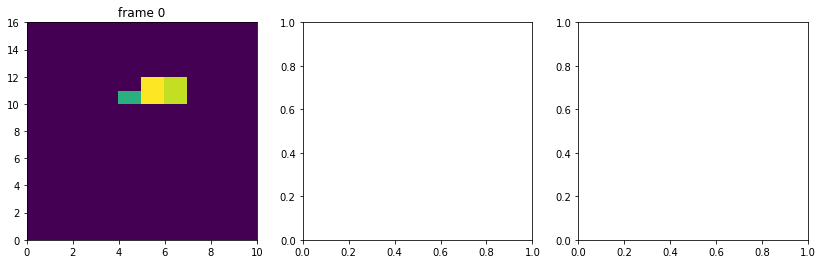

In [121]:
from matplotlib import animation, rc
from IPython.display import clear_output
from time import sleep
#ho provato a fare le animazioni ma con i notebook non vanno, ci sarà il metodo sicuramente ma devo ricercare
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(14,4))
for i in range(np.size(coord_angles,axis=0)):
    ax0.cla()
    ax0.pcolor(coord_angles[i,:,:])
    ax0.set_title("frame {}".format(i))
    # Note that using time.sleep does *not* work here!
    #sleep(0.1)
    #clear_output(wait=True)
    #plt.pause(0.1)
    plt.show()    
for i in range(np.size(coord_angles,axis=1)):
    ax1.cla()
    ax1.pcolor(coord_angles[:,i,:])
    ax1.set_title("frame {}".format(i))
    # Note that using time.sleep does *not* work here!
    #sleep(0.1)
    #clear_output(wait=True)
    plt.show()    
for i in range(np.size(coord_angles,axis=2)):
    ax2.cla()
    ax2.pcolor(coord_angles[:,:,i])
    ax2.set_title("frame {}".format(i))
    # Note that using time.sleep does *not* work here!
    #sleep(0.1)
    #clear_output(wait=True)
    plt.show()    

fig.tight_layout()
